count    98.000000
mean      9.142857
std       6.598969
min       0.000000
25%       2.000000
50%      10.000000
75%      14.000000
max      23.000000
Name: Hour of Day, dtype: float64


'\nFor every row in crashes data set, lambda is applied to each\nrow in the dataframe.\nCompare it to the Boolean value (<25),\nLoc compares it to the Boolean (T/F) and only returns \nthe true outcomes to include in output dataframe\n'

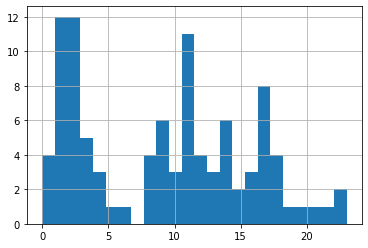

In [75]:
"""
What's this? 

In-class demo for week twelve in ATE-252
using the 'lite' crash data set
"""


import matplotlib.pyplot as plt
import numpy as no
import pandas as pd
%matplotlib inline

## Read in the whole csv as the pandas dataframe
crashes = pd.read_csv('crashtest_lite.csv')

## Check the columns data types
#print(crashes.dtypes)

## Extract the hour of the day (24 hour clock)
## store in its own dataframe with only HoD
time_of_day = crashes['Hour of Day']
#print(time_of_day)

## Pandas has built in visualization functions
## in this case we are using a histogram to
## graph the hours, choosing 24 hours since
## there are 24 hours located
#time_of_day.hist(bins=24)
#print(time_of_day.describe())

## Notice that there is an outlier (99)
## Let's slice this out since it's skewing
## our graph. For this we'll use loc() on the
## SERIES object

## intitiate a new variable
## Go through all the rows of crashes
## take the existing dataframe, select only
## real hourss (< 25)
## initiate a new dataframe with clean times
clean_crashes = crashes.loc[lambda crashes: crashes['Hour of Day']<25]
print(clean_crashes['Hour of Day'].describe())
clean_crashes['Hour of Day'].hist(bins=24)

"""
For every row in crashes data set, lambda is applied to each
row in the dataframe.
Compare it to the Boolean value (<25),
Loc compares it to the Boolean (T/F) and only returns 
the true outcomes to include in output dataframe
"""


     43
1    29
2    19
3     8
Name: Estimated Hours Closed, dtype: int64
1    29
2    19
3     8
Name: Estimated Hours Closed, dtype: int64


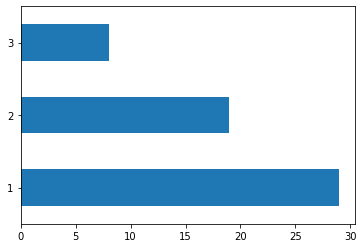

In [143]:
## Practice with a new series
#person_count = crashes['Person Count']
#person_count.describe()
#person_count.hist()


"""
What happened here?
Estimate Hours Closed contains many entries (43) that have no value.
In order to clean this up we need to remove the white space from the
count as it's causing a problem. To do that we'll invoke a lambda
on the series to iterate over each row, and with loc[] we return
all values that match the logic i.e. that are not whitespaces


Plotting the clean hours looks much better now since we are
ignoring empty/non-existant values.
"""
old_hours = crashes['Estimated Hours Closed'].value_counts()
print(old_hours)


new_hours = crashes.loc[lambda crashes:
                              crashes['Estimated Hours Closed']!=' ']

clean_hours = new_hours['Estimated Hours Closed'].value_counts()
print(clean_hours)

clean_hours.plot(kind='barh')


<class 'numpy.ndarray'>


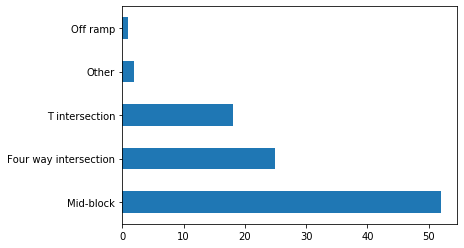

In [80]:
## Here we're slicing the dataframe into a subset by
## the series (column) names

subset_dataframe = clean_crashes.loc[:, 'Crash Record Number':'Total Unit Count']
#print(subset_dataframe.dtypes)

subset_dataframe.head()

## Let's take a look at the counts of crashed by
## intersection type (counts by unique values)
## Remember this goes from dataframe down to a series
## This is an example (albeit a small one) of method chaining
subset_dataframe['Intersection Type'].value_counts().plot(kind='barh')

## Working to pull underlying data so that we can pass it to
## matplotlib for more hardcore plotting
value_count = subset_dataframe['Intersection Type'].value_counts()

## using the .values method to extract the numpy.ndarrah from the Series
raw_array = value_count.values
print(type(raw_array))



